In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy as sio

In [2]:
# DE function

def Ecuacdif(x, y):
    dydx = -(200 * y ** 2 + y + x + 1)
    return dydx

In [16]:
# initial condition
y0 = 3

# x points

offset = 9e-3
x1 , x2 = 1e-3, 0.2 + offset
x = np.linspace(x1, x2, 1000)

def AiryAi( *args ):

    if len(args) > 1:
        _ , x = args
        return sio.special.airy(x)[1]
    
    x = args
    return sio.special.airy(x)[0]

def AiryBi( *args ):

    if len(args) > 1:
        _ , x = args
        return sio.special.airy(x)[3]
    
    x = args
    return sio.special.airy(x)[2]


analytic =  -(20 * AiryBi(1, -(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400) - 20 * AiryAi(1, -(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400) * (1201 * AiryBi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryBi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) / (1201 * AiryAi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryAi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) + 5 ** (0.1e1 / 0.3e1) * (-(1201 * AiryBi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryBi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) / (1201 * AiryAi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryAi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) * AiryAi(-(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400) + AiryBi(-(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400))) * 5 ** (0.2e1 / 0.3e1) / (-2000 * (1201 * AiryBi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryBi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) / (1201 * AiryAi(-0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) + 4 * AiryAi(1, -0.799e3 / 0.400e3 * 5 ** (0.2e1 / 0.3e1)) * 5 ** (0.2e1 / 0.3e1)) * AiryAi(-(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400) + 2000 * AiryBi(-(799 + 800 * x) * 5 ** (0.2e1 / 0.3e1) / 400))

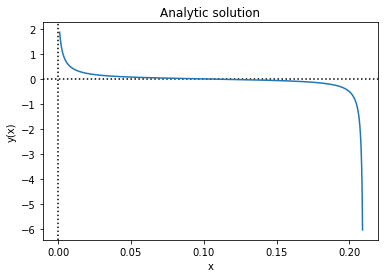

In [17]:
plt.axhline(y=0, color='k', linestyle=':')
plt.axvline(x=0, color='k', linestyle=':')
plt.plot(x,  analytic[0])
plt.title(f'Analytic solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

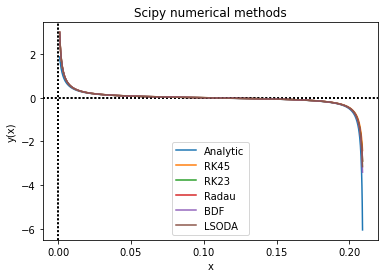

In [27]:
import time

methods = ['RK45', 'RK23', 'Radau', 'BDF', 'LSODA']

data = []


plt.plot(x, analytic[0], label='Analytic')

for method in methods:
    # solve DE

    t_start = time.time()
    sol = solve_ivp(Ecuacdif, [x1, x2], [y0], t_eval=x, atol=1e-15, method=method)
    duration = time.time() - t_start

    # plot results
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')
    plt.plot(sol.t, sol.y[0], label=method)
    plt.title("Scipy numerical methods")
    # plt.title(f'Method: {method}')
    plt.xlabel('x')
    plt.ylabel('y(x)')

    # plt.show()


    error = np.linalg.norm(  analytic - sol.y, 2 )

    row = [method, error, duration]
    data.append(row)

plt.legend()
plt.show()




In [28]:
import pandas as  pd 

dt = pd.DataFrame(data=data, columns=['method', 'error', 'time'])
dt.head()

,method,error,time
0,RK45,6.194020,0.001999
1,RK23,5.342041,0.007998
2,Radau,5.381188,0.021003
3,BDF,4.573756,0.024518
4,LSODA,4.962541,0.005998
